# Education

## Introduction

This project addresses inequality of educational opportunity in U.S. high schools. Here we will focus on average student performance on the ACT exams that students take as part of the college application process. Specifically, whether any socio-economic factors that affect the average ACT scores of the schools.

## Data collection

Edgap dataset : https://www.edgap.org
School Information data : https://github.com/brian-fischer/DATA-5100
School data : https://nces.ed.gov/programs/edge/

#### Importing essential libraries

In [285]:
# Import essential libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style for better aesthetics
sns.set_style("whitegrid")

# Ignore specific warnings that might clutter the output
import warnings

warnings.filterwarnings(
    "ignore", message="Unknown extension is not supported and will be removed"
)

### Loading datasets

In [286]:
# load edgap dataset
edgap = pd.read_excel("/tmp/EdGap_data.xlsx", dtype={"NCESSCH School ID": object})

In [287]:
# load school_information dataset
# Specify dtype for columns causing DtypeWarning to improve loading robustness
school_information = pd.read_csv("/tmp/school_info.csv", encoding='latin-1', dtype={
    'MSTREET2': object, 'MSTREET3': object, 'LSTREET2': object, 'LSTREET3': object
}, low_memory=False)

In [288]:
# load school characteristics dataset
school = pd.read_csv("/tmp/Public_School_Characteristics_2018-19.csv")

### Explore the contents of the data sets

Getting first 5 rows of the datasets

In [289]:
edgap.head()

NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0      100001600143              0.117962                           0.445283   
1      100008000024              0.063984                           0.662765   
2      100008000225              0.056460                           0.701864   
3      100017000029              0.044739                           0.692062   
4      100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

In [290]:
pd.set_option('display.max_columns', None)
school_information.head()
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102181 non-null  object 
 1   FIPST                102181 non-null  int64  
 2   STATENAME            102181 non-null  object 
 3   ST                   102181 non-null  object 
 4   SCH_NAME             102181 non-null  object 
 5   LEA_NAME             102181 non-null  object 
 6   STATE_AGENCY_NO      102181 non-null  int64  
 7   UNION                2531 non-null    float64
 8   ST_LEAID             102181 non-null  object 
 9   LEAID                102181 non-null  int64  
 10  ST_SCHID             102181 non-null  object 
 11  NCESSCH              102181 non-null  int64  
 12  SCHID                102181 non-null  int64  
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

In [291]:
school.head()
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100719 entries, 0 to 100718
Data columns (total 79 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   X                 100719 non-null  float64
 1   Y                 100719 non-null  float64
 2   OBJECTID          100719 non-null  int64  
 3   NCESSCH           100719 non-null  int64  
 4   SURVYEAR          100719 non-null  object 
 5   STABR             100719 non-null  object 
 6   LEAID             100719 non-null  int64  
 7   ST_LEAID          100719 non-null  object 
 8   LEA_NAME          100719 non-null  object 
 9   SCH_NAME          100719 non-null  object 
 10  LSTREET1          100718 non-null  object 
 11  LSTREET2          597 non-null     object 
 12  LCITY             100719 non-null  object 
 13  LSTATE            100719 non-null  object 
 14  LZIP              100719 non-null  int64  
 15  LZIP4             100719 non-null  object 
 16  PHONE             10

Get some of the information from the datasets like columns data types, number of rows and columns and number of missing values.

In [292]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [293]:
# This cell is consolidated into fe79c0f2

In [294]:
# This cell is consolidated into f960952d

Plotting pairplot to see the relationships between variables

Edgap dataset is an important dataset and we need all the columns from it. Plotting pair plot between the variables shows the distributions of one another.

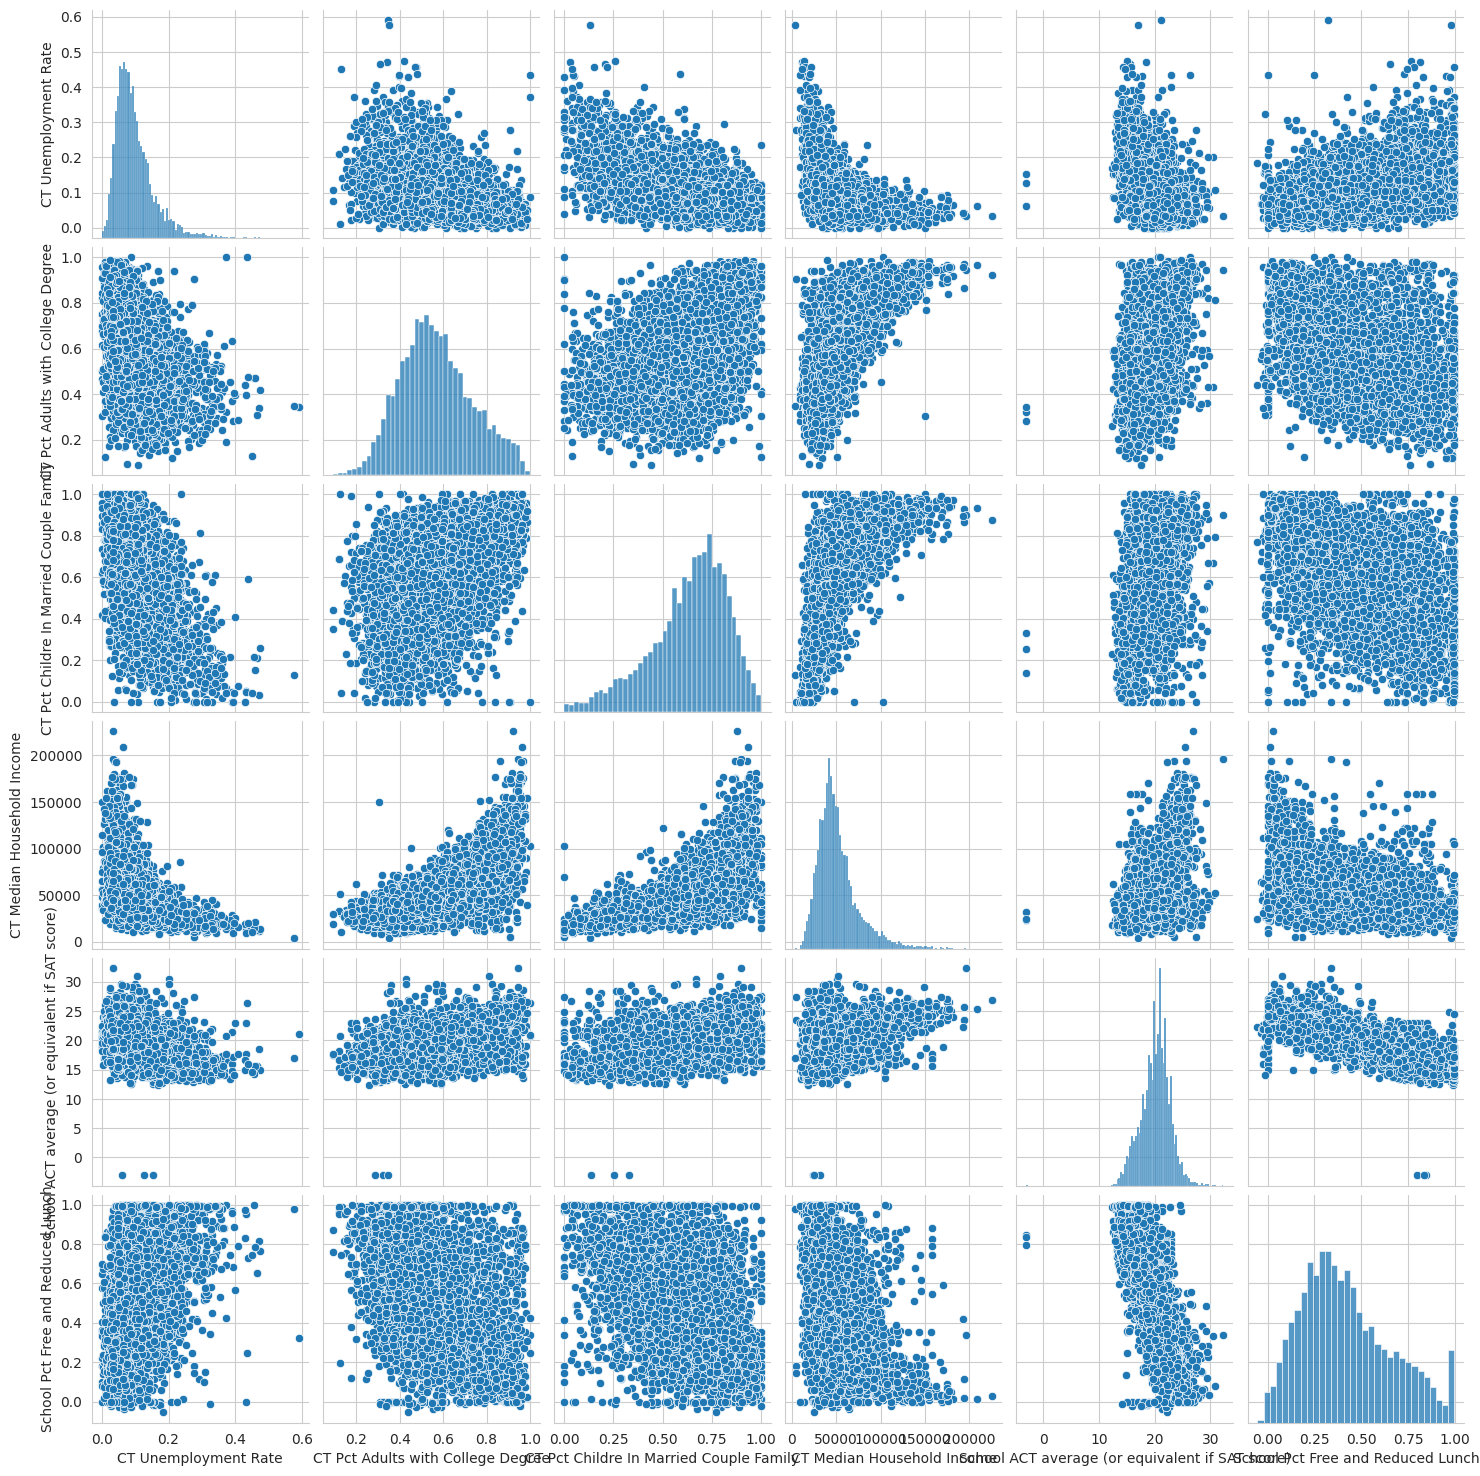

In [295]:
sns.pairplot(edgap.drop(columns="NCESSCH School ID"))

plt.show()

From the pair plot, we can notice that "CT Median Household Income" and "CT Unemployment rate" columns are right skewed.

"ACT average" values are normally distributed.

We can see some of the  linear patterns among the variables.

Add regression lines and format the pair plot

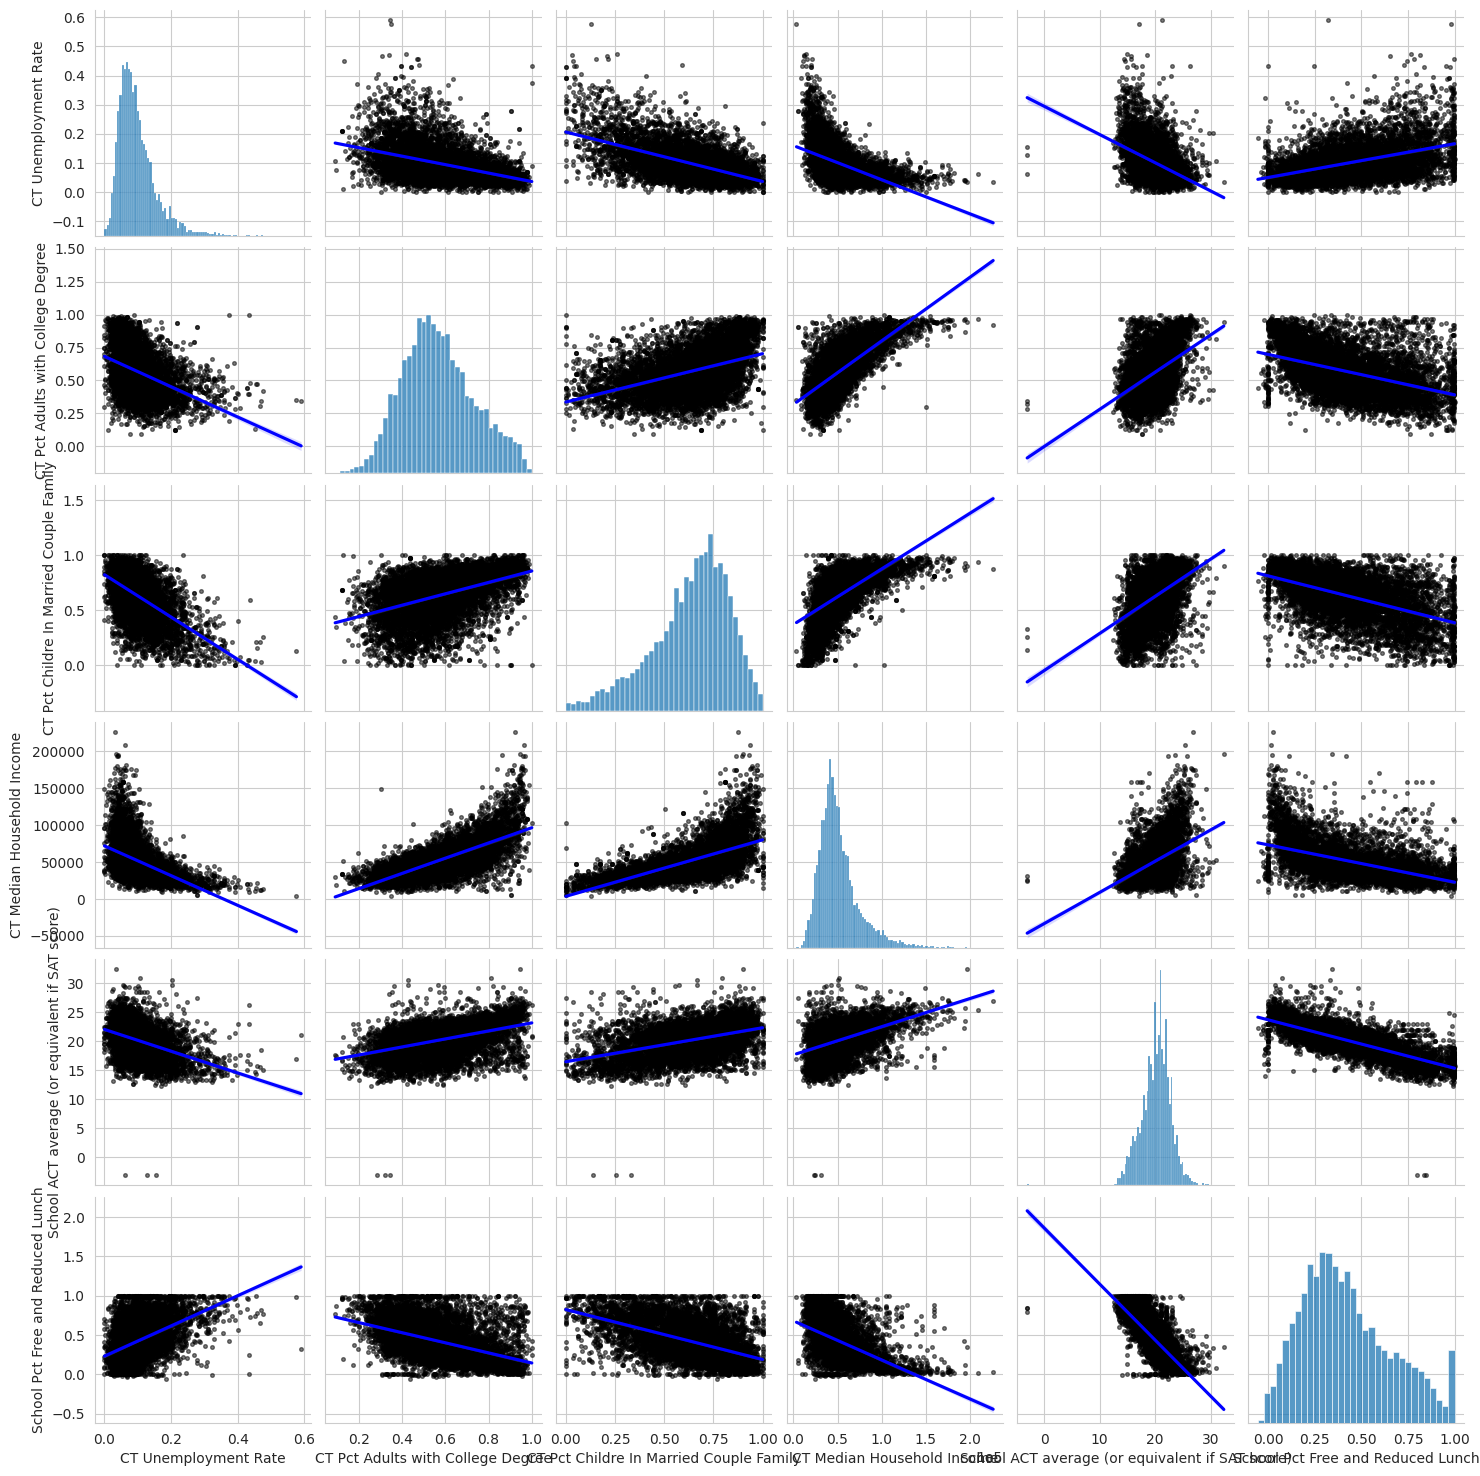

In [296]:
fig = sns.pairplot(edgap.drop(columns = "NCESSCH School ID"),
                  kind = "reg",
                  plot_kws = {
                      "line_kws": {"color": "blue"},
                      "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}
                  })

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))  # Apply scientific notation
        ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 30, ha = 'right')   #X-axis label size and rotation
        ax.set_ylabel(ax.get_ylabel(), fontsize = 8)  #Y-axis label size

        # Rotate x-axis tick labels
        plt.setp(ax.get_xticklabels(), rotation = 30, ha = 'right')

        plt.show()

After adding regression lines and colors, the graph is well vivid than before.

We can see some linear correlation between some of the variables.

This indicates that we can use this dataset for further analysis.

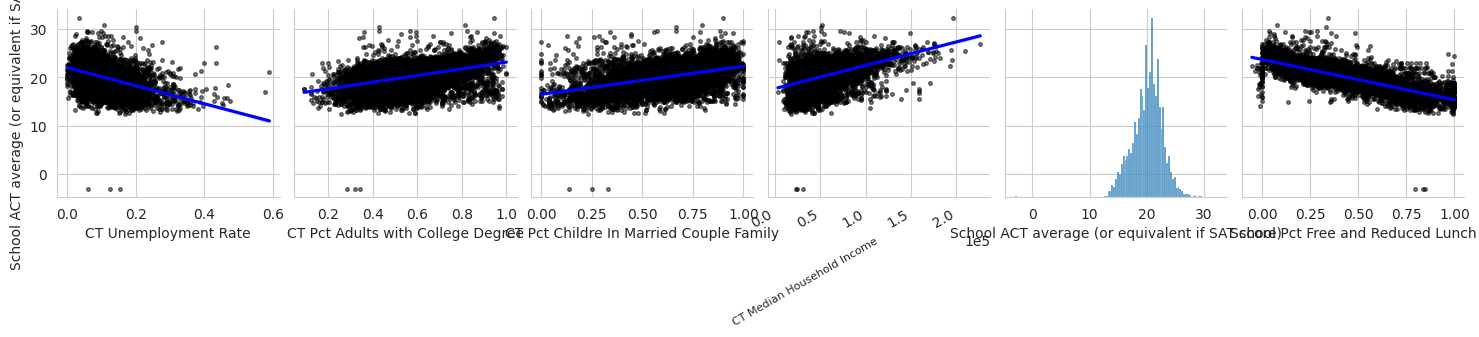

In [297]:
fig = sns.pairplot(edgap.drop(columns = "NCESSCH School ID"),
                  y_vars = ["School ACT average (or equivalent if SAT score)"],
                  kind = "reg",
                  plot_kws = {
                      "line_kws": {"color": "blue"},
                      "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}
                  })

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))  # Apply scientific notation
        ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 30, ha = 'right')   #X-axis label size and rotation
        ax.set_ylabel(ax.get_ylabel(), fontsize = 8)  #Y-axis label size

        # Rotate x-axis tick labels
        plt.setp(ax.get_xticklabels(), rotation = 30, ha = 'right')

        plt.show()

### Data Preparation

Selecting relevant columns from school_information and school datasets.

In [298]:
school_information = school_information[['SCHOOL_YEAR','NCESSCH','LSTATE','LZIP','SCH_TYPE_TEXT','LEVEL','CHARTER_TEXT','ST_SCHID']]

In [299]:
school_information.head()

SCHOOL_YEAR      NCESSCH LSTATE   LZIP       SCH_TYPE_TEXT LEVEL  \
0   2016-2017  10000200277     AL  35220  Alternative School  High   
1   2016-2017  10000201667     AL  36067  Alternative School  High   
2   2016-2017  10000201670     AL  36784  Alternative School  High   
3   2016-2017  10000201705     AL  36057  Alternative School  High   
4   2016-2017  10000201706     AL  35206  Alternative School  High   

  CHARTER_TEXT     ST_SCHID  
0           No  AL-210-0020  
1           No  AL-210-0050  
2           No  AL-210-0060  
3           No  AL-210-0030  
4           No  AL-210-0040

In [300]:
school = school[["NCESSCH","STUTERATIO"]]

In [301]:
school.head()

NCESSCH  STUTERATIO
0  20051000480        18.6
1  20061000470        11.1
2  20039000448        15.7
3  20039000463        15.9
4  20039000513         9.0

Rename columns

Renaming the columns which has capital letters and short forms to lower case and describing column names.

'NCESSH' name in the three datasets should be changed to 'id', easier for merging all the datasets.

In [302]:
edgap.columns

Index(['NCESSCH School ID', 'CT Unemployment Rate',
       'CT Pct Adults with College Degree',
       'CT Pct Childre In Married Couple Family', 'CT Median Household Income',
       'School ACT average (or equivalent if SAT score)',
       'School Pct Free and Reduced Lunch'],
      dtype='object')

In [303]:
edgap = edgap.rename(columns = {
    "NCESSCH School ID": "id",
    "CT Pct Adults with College Degree": "percent_college",
    "CT Unemployment Rate": "rate_unemployment",
    "CT Pct Childre In Married Couple Family": "percent_married",
    "CT Median Household Income": "median_income",
    "School ACT average (or equivalent if SAT score)": "average_act",
    "School Pct Free and Reduced Lunch": "percent_lunch"
})

In [304]:
school_information.columns

Index(['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL',
       'CHARTER_TEXT', 'ST_SCHID'],
      dtype='object')

In [305]:
school_information = school_information.rename(columns = {
    "SCHOOL_YEAR": "year",
    "NCESSCH": "id",
    "LSTATE": "state",
    "LZIP": "zip_code",
    "SCH_TYPE_TEXT": "school_type",
    "LEVEL": "school_level",
    "CHARTER_TEXT": "charter",
    "ST_SCHID": "state_id"
})

In [306]:
school.columns

Index(['NCESSCH', 'STUTERATIO'], dtype='object')

In [307]:
school = school.rename(columns = {
    "NCESSCH" : "id",
    "STUTERATIO": "student_teacher_ratio"
})

Joining dataframes

In school_information data, 'id' is a 'float64' data type. The data type should be changed to 'object'.

In [308]:
school_information['id'] = school_information['id'].astype('object')

In [309]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102181 non-null  object
 1   id            102181 non-null  object
 2   state         102181 non-null  object
 3   zip_code      102181 non-null  int64 
 4   school_type   102181 non-null  object
 5   school_level  102181 non-null  object
 6   charter       102181 non-null  object
 7   state_id      102181 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


In schools data also, the 'id' data type should be changed to object type.

In [310]:
school["id"] = school["id"].astype("object")

In [311]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100719 entries, 0 to 100718
Data columns (total 2 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     100719 non-null  object 
 1   student_teacher_ratio  96456 non-null   float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


Joining all the three dataframes using the primary key 'id'. Here, we are using left join because we need all the rows from
edgap and only the relevant rows to the edgap from the remaining dataframes.

In [312]:
# Join all the three dataframes using the primary key 'id'. Here, we are using left join because we need all the rows from
# edgap and only the relevant rows to the edgap from the remaining dataframes.
df = edgap.merge(school_information,
                how = "left",
                on = "id").merge(school, how = "left", on = "id")

In [313]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7986 non-null   object 
 1   rate_unemployment      7972 non-null   float64
 2   percent_college        7973 non-null   float64
 3   percent_married        7961 non-null   float64
 4   median_income          7966 non-null   float64
 5   average_act            7986 non-null   float64
 6   percent_lunch          7986 non-null   float64
 7   year                   7898 non-null   object 
 8   state                  7898 non-null   object 
 9   zip_code               7898 non-null   float64
 10  school_type            7898 non-null   object 
 11  school_level           7898 non-null   object 
 12  charter                7898 non-null   object 
 13  state_id               7898 non-null   object 
 14  student_teacher_ratio  7748 non-null   float64
dtypes: f

Get information from the merged dataframe.

In [314]:
# This cell is consolidated into b073c3e5

Now, we have 7986 rows and 15 columns. In that, some columns have missing values.

#### Quality control

There are natural bounds for the numerical variables in the dataset. Check the maximum and minimum values in each column.

In [315]:
df.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch      zip_code  student_teacher_ratio  
count  7986.000000    7986.000000   7898.000000            7748.000000  
mean     20.181532       0.420651  44851.511902              16.232331  
std       2.595201       0.239754  24058.674858               9.394468  
min      -3.070818      -0.054545   1001.000000              -2.000000  
25%      18.600000       0.238501  28426.000000              13.400000  
50%      20.400000       0.381570  45243.000000              15.700000  
75%      21.910867       0.575447  62350.000000              18.300000  
max      32.362637       0.998729  99403.000000             616.700000

In [316]:
#Alternate to the above method
df.select_dtypes(include = ['number']).agg(['min','max']).round(2)

rate_unemployment  percent_college  percent_married  median_income  \
min               0.00             0.09              0.0         3589.0   
max               0.59             1.00              1.0       226181.0   

     average_act  percent_lunch  zip_code  student_teacher_ratio  
min        -3.07          -0.05    1001.0                   -2.0  
max        32.36           1.00   99403.0                  616.7

The minimum values of average_act, percent_lunch and student_teacher_ratio are not out-of-range values.

Set out-of-range values to NaN using np.nan

In [317]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [318]:
df.loc[df['student_teacher_ratio'] < 0, 'student_teacher_ratio'] = np.nan

In [319]:
df.loc[df['average_act'] < 0, 'average_act'] = np.nan

Check the types, levels and charter status of schools

In [320]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [321]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [322]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

Keep only the high schools

In [323]:
df = df.loc[df['school_level'] == 'High']

Check for any duplicated rows

In [324]:
# Check for duplicates in school_information and school before merging
print("Number of duplicates in school_information based on 'id':", school_information.duplicated(subset=['id']).sum())
print("Number of duplicates in school based on 'id':", school.duplicated(subset=['id']).sum())

df.duplicated().sum()

Number of duplicates in school_information based on 'id': 0
Number of duplicates in school based on 'id': 0


np.int64(0)

Identify missing values

In [325]:
df.isna().sum().to_frame(name = 'Number of missing values')

Number of missing values
id                                            0
rate_unemployment                            12
percent_college                              11
percent_married                              20
median_income                                16
average_act                                   3
percent_lunch                                20
year                                          0
state                                         0
zip_code                                      0
school_type                                   0
school_level                                  0
charter                                       0
state_id                                      0
student_teacher_ratio                        95

In [326]:
percent_missing = df.isna().mean().round(4) * 100

percent_missing.to_frame(name = "Percent Missing Values")

Percent Missing Values
id                                       0.00
rate_unemployment                        0.17
percent_college                          0.15
percent_married                          0.28
median_income                            0.22
average_act                              0.04
percent_lunch                            0.28
year                                     0.00
state                                    0.00
zip_code                                 0.00
school_type                              0.00
school_level                             0.00
charter                                  0.00
state_id                                 0.00
student_teacher_ratio                    1.31

Get the number of states in the dataframe.

In [327]:
df["state"].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [328]:
df['state'].nunique()

20

Here, only 20 states are in the dataframe.

Plot the results on a map

In [329]:
# import plotly library
import plotly.offline as po
import plotly.graph_objs as pg

In [330]:
# use USA to plot map and colors to indicate number of schools
layout = dict(
geo = {"scope": "usa"}, coloraxis_colorbar = dict(title = "Number of Schools"))

data = dict(type = "choropleth",
           locations = df["state"].value_counts().index,
           locationmode = "USA-states",
           z = df["state"].value_counts().values,
           coloraxis = "coloraxis")

x = pg.Figure(data = [data], layout = layout)

po.iplot(x)

The map shows the geographic distribution of schools across U.S. states.
Each state’s color intensity directly represents how many schools are recorded for that state in your dataset.

Drop the rows where the average ACT score is missing

In [331]:
df = df.dropna(subset = ['average_act'])

In [332]:
df.isna().sum().to_frame(name = "Number of Missing Values")

Number of Missing Values
id                                            0
rate_unemployment                            12
percent_college                              11
percent_married                              20
median_income                                16
average_act                                   0
percent_lunch                                20
year                                          0
state                                         0
zip_code                                      0
school_type                                   0
school_level                                  0
charter                                       0
state_id                                      0
student_teacher_ratio                        95

### Data imputation

Taking the variables to use as a predictors of act score.

In [333]:
predictor_variables = ['rate_unemployment',
                      'percent_college',
                      'percent_married',
                      'median_income',
                      'percent_lunch',
                      'state',
                      'charter',
                      'student_teacher_ratio']

Import IterativeImputer from sklearn

In [334]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Instantiate the IterativeImputer class.

In [335]:
imputer = IterativeImputer()

Fit the imputer using the numerical predictor variables(this can include dummies for categorical variables).

In [336]:
numerical_predictors = df[predictor_variables].select_dtypes(include = 'number').columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'student_teacher_ratio']


In [337]:
# Fit the imputer
imputer.fit(df.loc[:,numerical_predictors])

IterativeImputer()

Impute the missing values in the training data

In [338]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

Check for missing values

In [339]:
df.isna().sum().to_frame(name = "Number of Missing Values")

Number of Missing Values
id                                            0
rate_unemployment                             0
percent_college                               0
percent_married                               0
median_income                                 0
average_act                                   0
percent_lunch                                 0
year                                          0
state                                         0
zip_code                                      0
school_type                                   0
school_level                                  0
charter                                       0
state_id                                      0
student_teacher_ratio                         0

Now the data become clean.

#### Export the clean data set

In [340]:
df.to_csv('education_clean.csv',
         encoding = 'utf-8-sig',
         index = False)

### Exploratory data analysis

Import libraries for modeling

In [341]:
#  Model preprocessing
from sklearn.preprocessing import StandardScaler

#Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

#Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

Examine distributions and relationships

Plot the correlation matrix of the numerical variables in the training data to explore relationships between the variables.

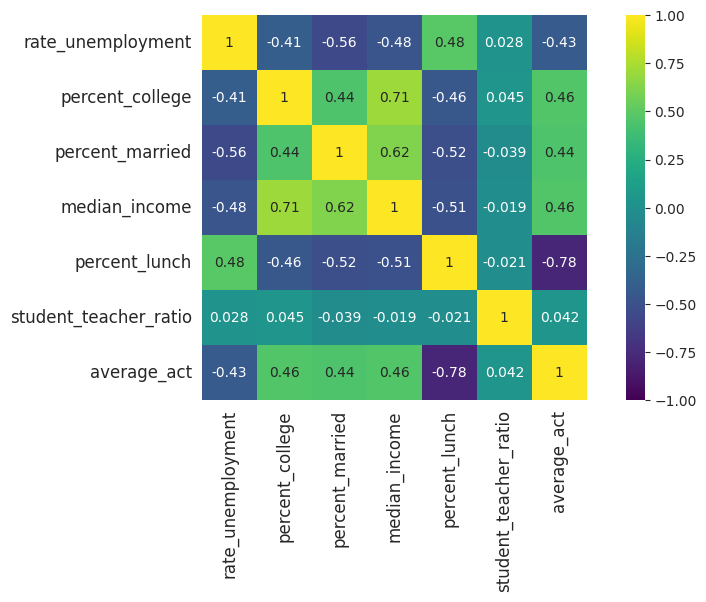

In [342]:
# compute correlation coefficient between all numerical variables
corr_matrix = df[numerical_predictors + ["average_act"]].corr()

# figure size
plt.figure(figsize = (10, 5))

# plot heat map with the correlation coefficients
sns.heatmap(corr_matrix, vmax = 1, vmin = -1, square = True, annot = True, cmap = "viridis")

#label size
plt.tick_params(labelsize = 12)

# display
plt.show()

There is a high correlation between "percent_lunch and average_act" and "median_income and percent_college".

There is no linear correlation between student_teacher_ratio and other variables, particularly average_act. The relationship is statistically weak or random.

#### Make pair plots to explore relationships between the variables

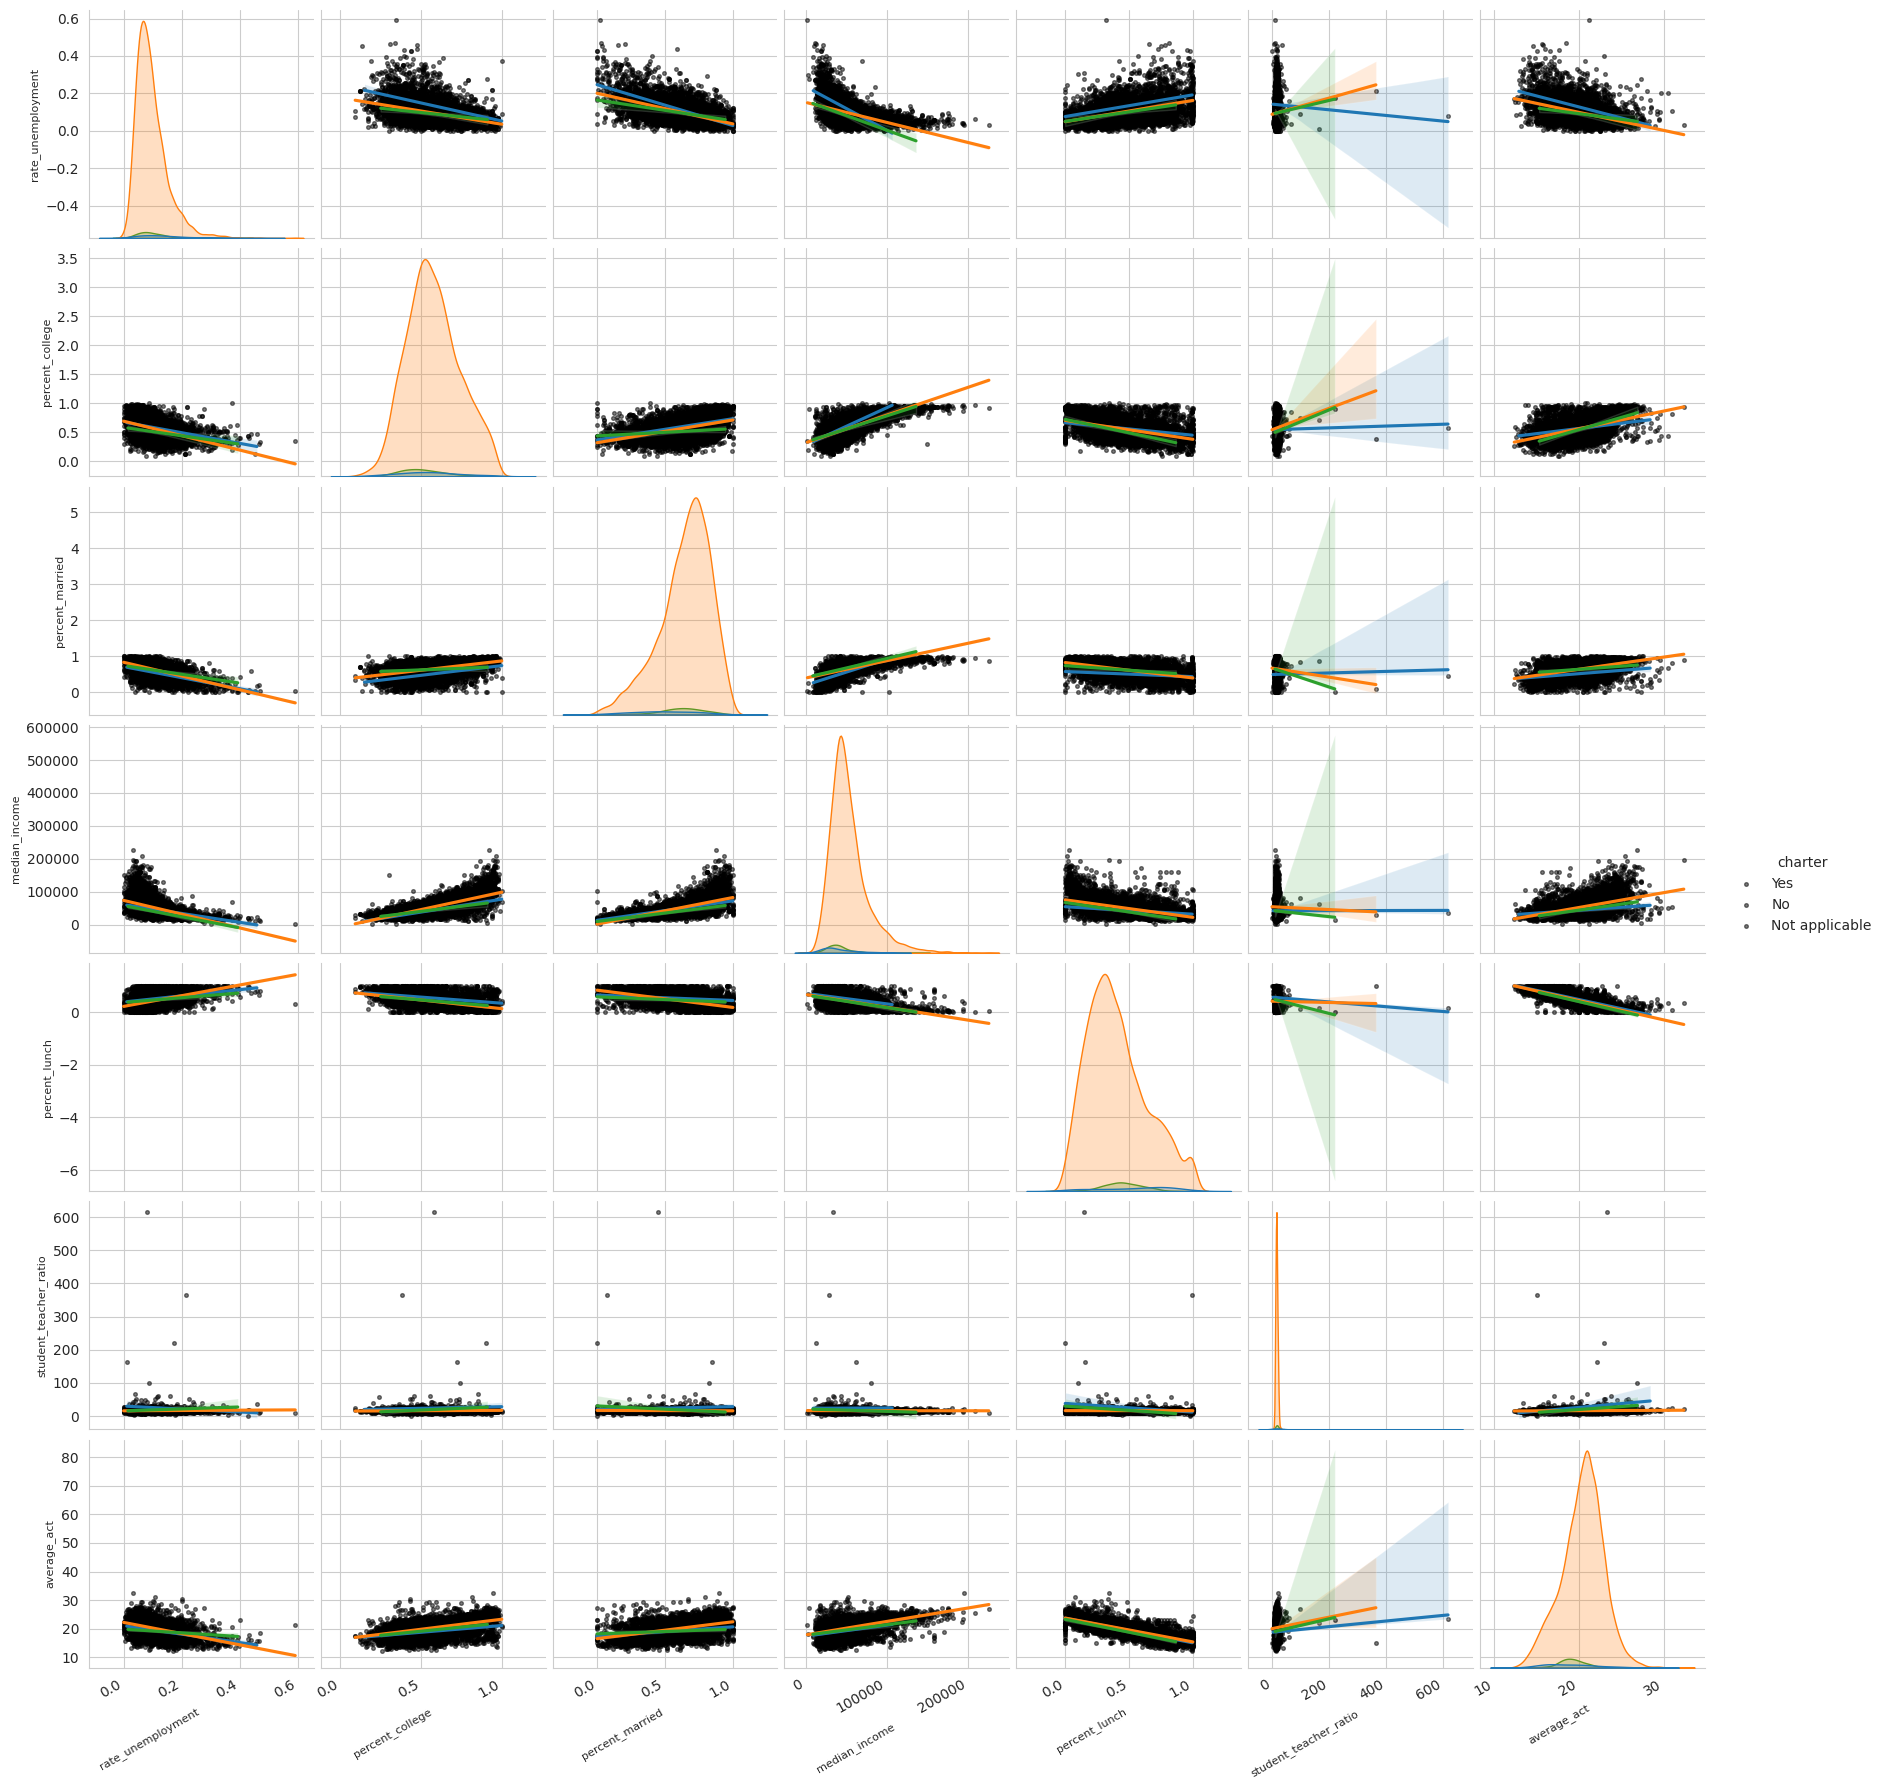

In [343]:
# plot pairplot with charter on hue
fig = sns.pairplot(data = df,
                  vars = numerical_predictors + ['average_act'],
                  hue = 'charter',
                  kind = 'reg',
                  plot_kws = {"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
                             })


for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))   # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 30, ha = 'right')
    ax.set_ylabel(ax.get_ylabel(), fontsize = 8)

    plt.setp(ax.get_xticklabels(), rotation = 30, ha = 'right')

plt.show()

An average_act scores are normally distributed.

There is no relation among student_teacher_ratio and all other variables.

The student_teacher_ratio variable plot falls in a straight line.

#### Identify outliers using boxplot

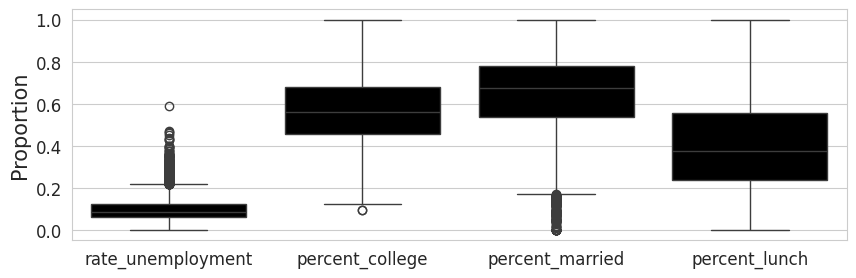

In [344]:
# figure size
plt.figure(figsize = (10,3))

# set numerical_predictors to the variable fraction and remove 'median_income' from it
fractions = list(numerical_predictors)
fractions.remove('median_income')
fractions.remove('student_teacher_ratio')
# plot boxplot
sns.boxplot(data = df[fractions], color = 'k')

# label
plt.ylabel('Proportion', fontsize = 15)

# label size
plt.tick_params(labelsize = 12)

# display
plt.show()

we removed median_income and student_teacher_ratio because its scale or unit range is very different from the other variables plotted.

Including median_income and student_teacher_ratio would make the other boxes look flat or compressed due to scale differences.

So excluding it makes the plot easier to interpret.

Plot boxplot for median income

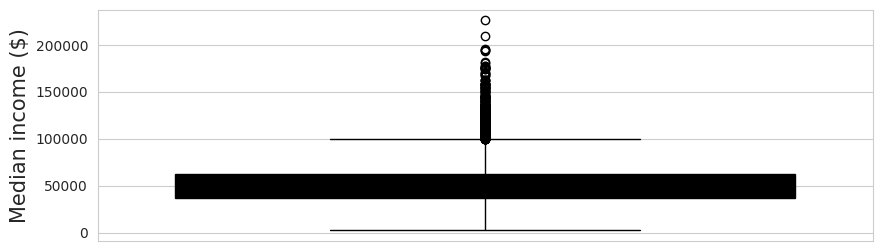

In [345]:
# figure size
plt.figure(figsize = (10,3))

# plot boxplot
sns.boxplot(data = df, y = 'median_income', color = 'k')

# label
plt.ylabel('Median income ($)', fontsize = 15)

# display
plt.show()

Plot boxplot for student_teacher_ratio

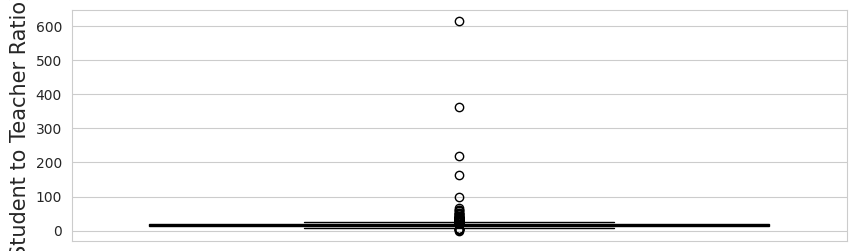

In [346]:
# figure size
plt.figure(figsize = (10,3))

# plot boxplot
sns.boxplot(data = df, y = 'student_teacher_ratio', color = 'k')

# label
plt.ylabel('Student to Teacher Ratio)', fontsize = 15)

# display
plt.show()

## Modeling

plot the regression line and scatter plot

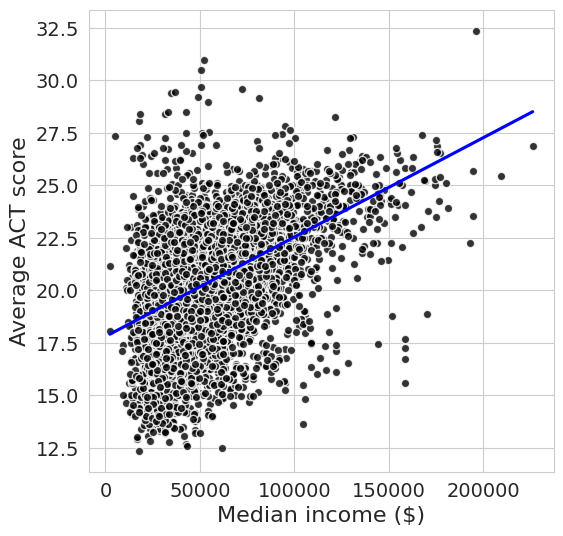

In [347]:
# figure size
plt.figure(figsize = (6,6))

# plot scatter plot with regression lines for median_income and average_act
sns.regplot(data = df,
           x = 'median_income',
           y = 'average_act',
           color = 'blue',
           ci = False,
           scatter_kws = {'color':'black','edgecolors':'white','linewidths':1})

# Add axis labels
plt.xlabel('Median income ($)', fontsize = 16)
plt.ylabel('Average ACT score', fontsize = 16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 14)

# display
plt.show()

There is a positive linear correlation between median income and average ACT.

Fit the simple linear regression model

In [348]:
model_median_income = smf.ols(formula = 'average_act ~ median_income', data = df).fit()

In [349]:
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        04:07:08   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8025      0.063    284.789

R squared is 0.211, which indicates income alone doesn’t capture everything.

p-value is less than 0.001, the relationship isn’t random — it’s statistically meaningful.

Median income is a significant predictor, but not a dominant one — it explains only around 21% of the total variation.

This implies socioeconomic factors matter, but many other influences (school resources, teacher quality, demographics) also shape student outcomes.

#### Numerical assessment of fit accuracy

Compute the R-squared

In [350]:
model_median_income.rsquared

np.float64(0.21119569093640744)

Compute the RMSE

In [351]:
y_hat = model_median_income.predict()

In [352]:
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

np.float64(2.228)

Compute mean absolute error

In [353]:
mean_absolute_error(df['average_act'], y_hat)

1.7129298449480643

Use a residual plot for graphical assessment of model fit

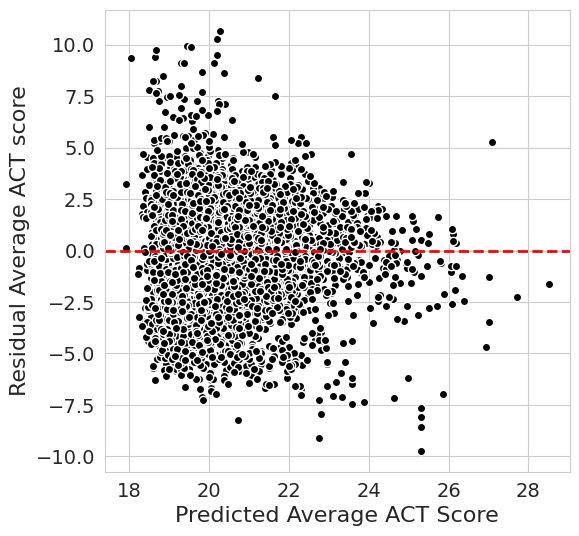

In [354]:
# figure size
plt.figure(figsize = (6,6))
# plot residuals across median income
plt.plot(y_hat, model_median_income.resid, 'ko', mec = 'w')
# add axis line to indicate the error is 0.
plt.axhline(0, color = 'r', linestyle = 'dashed', lw = 2)

# Add axis labels
plt.xlabel('Predicted Average ACT Score', fontsize = 16)
plt.ylabel('Residual Average ACT score', fontsize = 16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 14)

# display
plt.show()

The  points are clustered around the red line, Model may be missing other predictors or interactions.

Some points are spread out, possibly outliers.

Try a quadratic model, plot the regression curves and a scatter plot

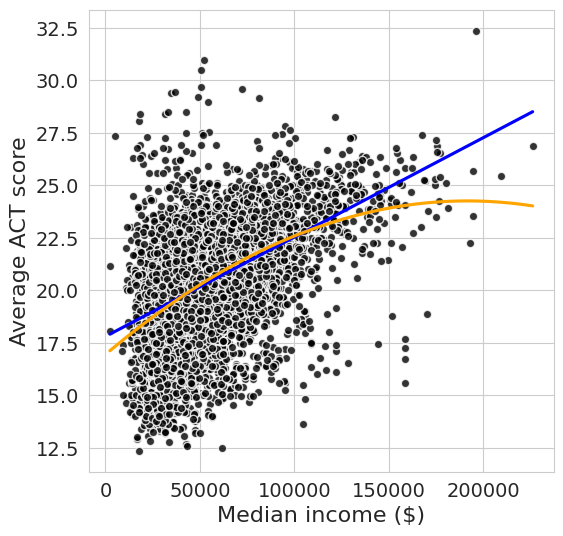

In [355]:
# figure size
plt.figure(figsize = (6,6))

# plot scatter plot with regression lines for median_income and average_act
sns.regplot(data = df,
           x = 'median_income',
           y = 'average_act',
           color = 'blue',
           ci = False,
           scatter_kws = {'color':'black','edgecolors':'white','linewidths':1})

# add quadratic line
sns.regplot(data = df,
           x = 'median_income',
           y = 'average_act',
           order = 2,           # indicate quadratic regression line
           color = 'orange',
           ci = False,
           scatter = False)

# Add axis labels
plt.xlabel('Median income ($)', fontsize = 16)
plt.ylabel('Average ACT score', fontsize = 16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 14)

# display
plt.show()

The two lines overlap, Linear model is sufficient — adding curvature doesn’t add much explanatory power.

ACT scores rise with income up to a point, then level off for quadratic line.

#### Fit a quadratic linear regression model

In [356]:
model_median_income2 = smf.ols(formula = 'average_act ~ median_income + I(median_income**2)', data = df).fit()

In [357]:
model_median_income2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1014.
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        04:07:10   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.9453      0.118    143.770      0.000      16.714      17.176
median_income          7.632e-05   3.55e-06     21.489      0.000    6.94e-05    8.33e-05
I(median_income ** 2) -1.991e-10   2.33e-11     -8.562      0.000   -2.45e-10   -1.54e-10
==============================================================================
Omnibus:                      186.734   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.686
Skew:                          -0.140   Prob(JB):                     1.20e-86
Kurtosis:                       4.112   Cond. No.                     2.27e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Slight improvement in the R-squared, explains 0.8% more variance.

Adding the squared term slightly improves model performance, confirming that nonlinearity exists — but not a large one.

Median Income still matters, but the relationship isn’t perfectly linear.

#### Assess the model significance

In [358]:
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.429440e-99
I(median_income ** 2)    1.338124e-17
dtype: float64

In [359]:
anova_lm(model_median_income, model_median_income2)

df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7225.0  35864.594445      0.0         NaN        NaN           NaN
1    7224.0  35504.282123      1.0  360.312322  73.312177  1.338124e-17

anova_lm compares nested models to test whether adding extra terms (here, the quadratic term) significantly improves the fit.

Quadratic coefficient had p < 0.001, confirming the curve improves the fit.

Assess the model accuracy

Compute the mean absolute error

In [360]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972199288119176

Compute the R-squared

In [361]:
model_median_income2.rsquared

np.float64(0.21912038425731217)

Compute Root Mean Squared Error

In [362]:
y_hat_median_income = model_median_income.predict()

In [363]:
np.sqrt(mean_squared_error(df['average_act'], y_hat_median_income)).round(3)

np.float64(2.228)

#### Residual plot

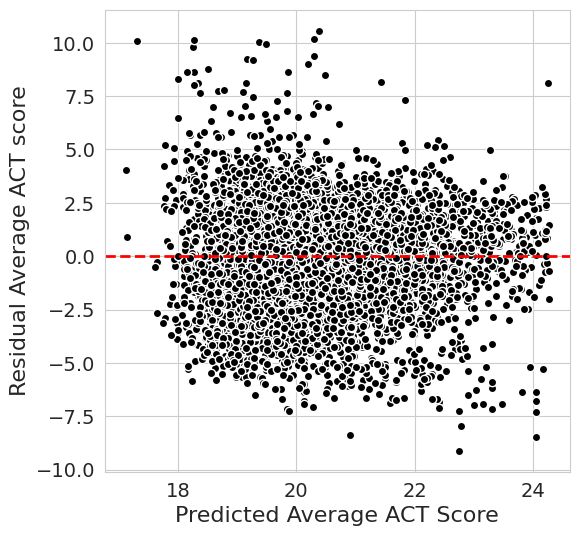

In [364]:
# figure size
plt.figure(figsize = (6,6))

# plot residuals across median income2
plt.plot(model_median_income2.predict(), model_median_income2.resid, 'ko', mec = 'w')
plt.axhline(0, color = 'r', linestyle = 'dashed', lw = 2)

# Add axis labels
plt.xlabel('Predicted Average ACT Score', fontsize = 16)
plt.ylabel('Residual Average ACT score', fontsize = 16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 14)

# display
plt.show()

Quadratic model reduced curvature in residuals seen in the linear model.

#### Multiple linear regression

Fit the multiple linear regression model using all socio-economic variables as predictors

In [366]:
# fit the model
model = smf.ols(formula = 'average_act ~ rate_unemployment+ percent_college + percent_married + median_income + percent_lunch + student_teacher_ratio + C(state) + C(charter)',
                data = df).fit()

In [367]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            average_act   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     566.0
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        05:32:27   Log-Likelihood:                -12786.
No. Observations:                7227   AIC:                         2.563e+04
Df Residuals:                    7199   BIC:                         2.582e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       18.6309      0.318     58.579      0.000      18.007      19.254
C(state)[T.FL]                   3.9561      0.300     13.205      0.000       3.369       4.543
C(state)[T.GA]                   3.9535      0.300     13.160      0.000       3.365       4.542
C(state)[T.IL]                   3.2151      0.297     10.827      0.000       2.633       3.797
C(state)[T.IN]                   3.5710      0.301     11.846      0.000       2.980       4.162
C(state)[T.KY]                   4.1597      1.460      2.850      0.004       1.298       7.021
C(state)[T.LA]                   3.5667      0.309     11.557      0.000       2.962       4.172
C(state)[T.MA]                   3.9686      0.304     13.047      0.000       3.372       4.565
C(state)[T.MI]                   2.5976      0.298      8.706      0.000       2.013       3.183
C(state)[T.MO]                   4.0414      0.301     13.422      0.000       3.451       4.632
C(state)[T.NC]                   3.9233      0.300     13.092      0.000       3.336       4.511
C(state)[T.NJ]                   3.2301      0.301     10.734      0.000       2.640       3.820
C(state)[T.NY]                   3.6093      0.304     11.858      0.000       3.013       4.206
C(state)[T.OH]                   4.4115      0.296     14.900      0.000       3.831       4.992
C(state)[T.PA]                   3.6932      0.297     12.439      0.000       3.111       4.275
C(state)[T.TN]                   2.9749      0.304      9.788      0.000       2.379       3.571
C(state)[T.TX]                   3.9187      0.294     13.307      0.000       3.341       4.496
C(state)[T.WA]                   4.3741      0.304     14.392      0.000       3.778       4.970
C(state)[T.WI]                   4.4285      0.301     14.729      0.000       3.839       5.018
C(state)[T.WY]                   1.6035      0.371      4.317      0.000       0.875       2.332
C(charter)[T.Not applicable]    -1.1159      1.427     -0.782      0.434      -3.913       1.681
C(charter)[T.Yes]               -0.1395      0.113     -1.233      0.218      -0.361       0.082
rate_unemployment               -0.8837      0.395     -2.239      0.025      -1.657      -0.110
percent_college                  1.8642      0.153     12.214      0.000       1.565       2.163
percent_married                  0.0082      0.127      0.065      0.948      -0.241       0.257
median_income                  4.46e-07   1.21e-06      0.368      0.713   -1.93e-06    2.82e-06
percent_lunch                   -7.6540      0.099    -76.985      0.000      -7.849      -7.459
student_teacher_ratio            0.0062      0.002      3.431      0.001       0.003       0.010
============================================================================

The model explains much more variance than the single-variable models(R-squared value went upto 0.629), so including additional socioeconomic variables dramatically improves predictive power.

Strongest predictors: percent_lunch, percent_college, rate_unemployment

Median income and percent_married are not significant after controlling for other factors

Assess the model accuracy

In [368]:
mean_absolute_error(df['average_act'], model.predict())

1.027535439818496

In [369]:
model.rsquared

np.float64(0.6797801887894985)

In [370]:
y_hat_model = model.predict()

In [371]:
np.sqrt(mean_squared_error(df['average_act'], y_hat_model)).round(3)

np.float64(1.419)

Residual plot

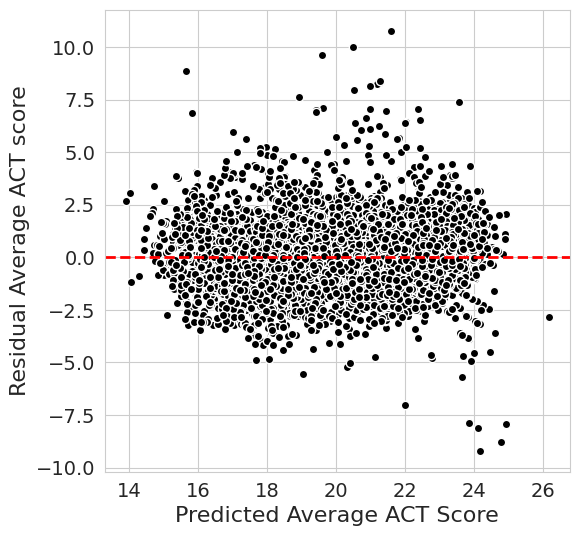

In [372]:
# figure size
plt.figure(figsize = (6,6))

# # plot residual for multilinear regression model
plt.plot(y_hat_model, model.resid, 'ko', mec = 'w')
plt.axhline(0, color = 'r', linestyle = 'dashed', lw = 2)

# Add axis labels
plt.xlabel('Predicted Average ACT Score', fontsize = 16)
plt.ylabel('Residual Average ACT score', fontsize = 16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 14)

# display
plt.show()

Residuals are more evenly scattered around 0 compared to single-predictor models.

### Fit a reduced model with significant predictors

In [404]:
model_reduced = smf.ols(formula = 'average_act ~ rate_unemployment + percent_college + percent_lunch + C(state) + C(charter)',
                data = df).fit()

In [374]:
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            average_act   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     635.4
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        05:32:34   Log-Likelihood:                -12792.
No. Observations:                7227   AIC:                         2.563e+04
Df Residuals:                    7202   BIC:                         2.581e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       18.7371      0.307     61.020      0.000      18.135      19.339
C(state)[T.FL]                   3.9944      0.299     13.347      0.000       3.408       4.581
C(state)[T.GA]                   3.9617      0.300     13.187      0.000       3.373       4.551
C(state)[T.IL]                   3.2075      0.297     10.805      0.000       2.626       3.789
C(state)[T.IN]                   3.5727      0.301     11.859      0.000       2.982       4.163
C(state)[T.KY]                   4.1932      1.461      2.871      0.004       1.330       7.056
C(state)[T.LA]                   3.5873      0.309     11.623      0.000       2.982       4.192
C(state)[T.MA]                   3.9495      0.304     12.983      0.000       3.353       4.546
C(state)[T.MI]                   2.6216      0.298      8.806      0.000       2.038       3.205
C(state)[T.MO]                   4.0320      0.301     13.406      0.000       3.442       4.622
C(state)[T.NC]                   3.9315      0.299     13.136      0.000       3.345       4.518
C(state)[T.NJ]                   3.2137      0.301     10.684      0.000       2.624       3.803
C(state)[T.NY]                   3.6134      0.304     11.867      0.000       3.016       4.210
C(state)[T.OH]                   4.4253      0.296     14.957      0.000       3.845       5.005
C(state)[T.PA]                   3.6869      0.297     12.418      0.000       3.105       4.269
C(state)[T.TN]                   2.9798      0.304      9.812      0.000       2.384       3.575
C(state)[T.TX]                   3.9183      0.295     13.305      0.000       3.341       4.496
C(state)[T.WA]                   4.3990      0.304     14.487      0.000       3.804       4.994
C(state)[T.WI]                   4.4187      0.300     14.716      0.000       3.830       5.007
C(state)[T.WY]                   1.5854      0.371      4.271      0.000       0.858       2.313
C(charter)[T.Not applicable]    -1.1326      1.428     -0.793      0.428      -3.931       1.666
C(charter)[T.Yes]               -0.1005      0.112     -0.896      0.371      -0.321       0.120
rate_unemployment_log           -0.9786      0.420     -2.332      0.020      -1.801      -0.156
percent_college                  1.9219      0.126     15.256      0.000       1.675       2.169
percent_lunch                   -7.6803      0.095    -80.615      0.000      -7.867      -7.494
==============================================================================
Omnibus:                     1195.124   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7104.919
Skew:                           0.658   Prob(JB):                         0.00
Kurtosis:                       7.676   Cond. No.  

The model remains highly predictive using only these 3 socioeconomic indicators.

The reduced model is numerically stable and easier to interpret than the full model.

Percent of students on free/reduced lunch (poverty proxy) — largest negative effect

Percent of adults with college education — positive effect

Local unemployment rate — negative effect

Dropped variables (median_income, percent_married, student_teacher_ratio) do not significantly influence ACT after accounting for these three.

Model fit remains strong (R² = 0.628), so these 3 variables explain most of the variation in ACT scores.

In [375]:
mean_absolute_error(df['average_act'], model_reduced.predict())

1.0276627031400933

In [376]:
model_reduced.rsquared

np.float64(0.6792246211588189)

In [377]:
y_hat_reduced = model_reduced.predict()

In [378]:
np.sqrt(mean_squared_error(df['average_act'], y_hat_reduced)).round(3)

np.float64(1.421)

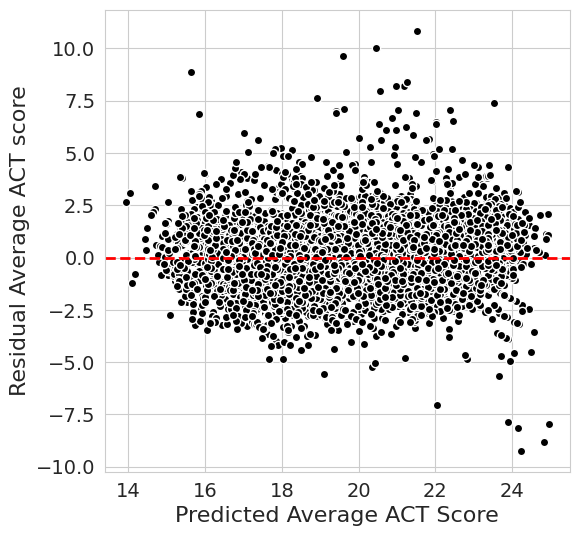

In [379]:
# figure size
plt.figure(figsize = (6,6))

# plot residue for model_reduced
plt.plot(y_hat_reduced, model_reduced.resid, 'ko', mec = 'w')
plt.axhline(0, color = 'r', linestyle = 'dashed', lw = 2)

# Add axis labels
plt.xlabel('Predicted Average ACT Score', fontsize = 16)
plt.ylabel('Residual Average ACT score', fontsize = 16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 14)

# display
plt.show()

In [380]:
anova_lm(model_reduced, model)

df_resid           ssr  df_diff    ss_diff         F    Pr(>F)
0    7202.0  14584.705912      0.0        NaN       NaN       NaN
1    7199.0  14559.445899      3.0  25.260014  4.163319  0.005907

## Scaling

Scale the predictor variables in the reduced model to have mean 0 and standard deviation 1 and add them to the dataframe

In [381]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch']

In [382]:
scaled_columns = [var + '_normalized' for var in predictor_variables]
scaled_columns

['rate_unemployment_normalized',
 'percent_college_normalized',
 'percent_lunch_normalized']

In [383]:
scaler = StandardScaler().fit(df[predictor_variables])

In [384]:
df[scaled_columns] = scaler.transform(df[predictor_variables])

Check the mean and standard deviation of the transformed data

In [385]:
df[scaled_columns].agg(['mean', 'std']).round(3)

rate_unemployment_normalized  percent_college_normalized  \
mean                          -0.0                         0.0   
std                            1.0                         1.0   

      percent_lunch_normalized  
mean                      -0.0  
std                        1.0

Fit the multiple regression models with the normalized predictors

In [386]:
model_normalized = smf.ols(formula = 'average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized + C(state) + C(charter)', data = df).fit()

In [387]:
model_normalized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            average_act   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     635.5
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        05:32:49   Log-Likelihood:                -12792.
No. Observations:                7227   AIC:                         2.563e+04
Df Residuals:                    7202   BIC:                         2.581e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       16.5960      0.291     57.103      0.000      16.026      17.166
C(state)[T.FL]                   3.9950      0.299     13.350      0.000       3.408       4.582
C(state)[T.GA]                   3.9621      0.300     13.189      0.000       3.373       4.551
C(state)[T.IL]                   3.2088      0.297     10.810      0.000       2.627       3.791
C(state)[T.IN]                   3.5730      0.301     11.860      0.000       2.982       4.164
C(state)[T.KY]                   4.1875      1.461      2.867      0.004       1.324       7.050
C(state)[T.LA]                   3.5873      0.309     11.623      0.000       2.982       4.192
C(state)[T.MA]                   3.9506      0.304     12.987      0.000       3.354       4.547
C(state)[T.MI]                   2.6228      0.298      8.811      0.000       2.039       3.206
C(state)[T.MO]                   4.0323      0.301     13.408      0.000       3.443       4.622
C(state)[T.NC]                   3.9322      0.299     13.139      0.000       3.345       4.519
C(state)[T.NJ]                   3.2145      0.301     10.687      0.000       2.625       3.804
C(state)[T.NY]                   3.6128      0.304     11.866      0.000       3.016       4.210
C(state)[T.OH]                   4.4260      0.296     14.960      0.000       3.846       5.006
C(state)[T.PA]                   3.6873      0.297     12.420      0.000       3.105       4.269
C(state)[T.TN]                   2.9801      0.304      9.814      0.000       2.385       3.575
C(state)[T.TX]                   3.9183      0.294     13.306      0.000       3.341       4.496
C(state)[T.WA]                   4.3992      0.304     14.488      0.000       3.804       4.994
C(state)[T.WI]                   4.4192      0.300     14.718      0.000       3.831       5.008
C(state)[T.WY]                   1.5866      0.371      4.274      0.000       0.859       2.314
C(charter)[T.Not applicable]    -1.1268      1.428     -0.789      0.430      -3.926       1.672
C(charter)[T.Yes]               -0.0985      0.112     -0.878      0.380      -0.319       0.122
rate_unemployment_normalized    -0.0507      0.021     -2.448      0.014      -0.091      -0.010
percent_college_normalized       0.3167      0.021     15.291      0.000       0.276       0.357
percent_lunch_normalized        -1.7982      0.022    -80.599      0.000      -1.842      -1.754
==============================================================================
Omnibus:                     1196.198   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7110.832
Skew:                           0.658   Prob(JB):                         0.00
Kurtosis:                       7.678   Cond. No.  

After scaling, there is no difference in the result but Normalizing confirms which predictors have the largest standardized impact on ACT scores.

#### Compare the accuracy between the original and normalized models

In [388]:
mae_normalized = mean_absolute_error(df['average_act'], model_normalized.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error' : [mae_normalized, mae_reduced], 'R Squared': [r2_normalized, r2_reduced]}, index = ['normalized model', 'reduced model']).round(4)

Mean Absolute Error  R Squared
normalized model               1.0276     0.6792
reduced model                  1.0277     0.6792

Normalization is only for interpretability (e.g., comparing effect sizes).

Model accuracy is unchanged: MAE and R² are identical.

Predictor importance is easier to visualize in standardized form.

### Conclusion

The socio-economic factors like percent lunch, unemployment rate and number of adults with college degree are the strongest predictor of ACT scores.

# Task
Refactor all code in the notebook to follow PEP 8 guidelines.

## Identify code cells

### Subtask:
Go through the notebook and identify all the code cells that need to be refactored.


**Reasoning**:
Identify all code cells and store their IDs in a list.



In [389]:
code_cell_ids = [
    "4e17577a", "129c4d2e", "73a01a80", "d9b4d8b7", "2b45a714", "2dd65f4d",
    "fe79c0f2", "f960952d", "eef225a2", "30543f99", "e4e7a32d", "f6d07154",
    "facd236c", "7e1b2357", "75e79a64", "fe7ff81a", "f8becf1a", "2ee11112",
    "c884d50e", "1aa38d27", "1eefef4e", "3a77f48e", "53092cc8", "1010ed68",
    "f5fb0914", "78269ede", "b3d2e01e", "3d5a5b19", "307b23d0", "b073c3e5",
    "f5595083", "990c4278", "eed6b219", "3d323b8a", "61d63ecb", "85c12a0e",
    "e241417a", "cd9c10c9", "690562f7", "572378ff", "658c9e33", "3496ee70",
    "82376a9c", "b96c74cc", "19c7d5c9", "2eb8c85f", "fadee1bb", "c2ac3bb6",
    "36fe5dc7", "c1b430f8", "c1faeecb", "946263a9", "9d9b80a3", "3f997362",
    "4ca933f7", "88a171c5", "48e787dd", "c97bcfdd", "9ed74e3a", "e5deb2fc",
    "fcfee8b7", "ea864ab6", "83871ceb", "f6674c0e", "d92171af", "22044c8c",
    "2408f34a", "e4786333", "2f44f8f1", "805da18e", "254f70aa", "b0e9f923",
    "cf39d616", "3b21202d", "84980204", "cc8e4460", "e58a21c7", "f371f070",
    "8eb5be6b", "ad43b4f2", "229eb263", "62f35145", "286f0e2a", "7c220408",
    "c7973dba", "ce054ab8", "a1b1e2d8", "4b1b74f9"
]

## Apply pep 8 formatting

### Subtask:
Apply PEP 8 formatting to the code in cell with ID `4e17577a`.


**Reasoning**:
Apply PEP 8 formatting to the code in the specified cell.



In [390]:
# Import pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# plotting style
sns.set_style("whitegrid")

import warnings

warnings.filterwarnings(
    "ignore", message="Unknown extension is not supported and will be removed"
)

## Apply pep 8 formatting

### Subtask:
Apply PEP 8 formatting to the code in cell with ID `129c4d2e`.


**Reasoning**:
Apply PEP 8 formatting to the code in cell with ID `129c4d2e`.



In [391]:
# load edgap dataset
edgap = pd.read_excel("/tmp/EdGap_data.xlsx", dtype={"NCESSCH School ID": object})

## Apply pep 8 formatting

### Subtask:
Apply PEP 8 formatting to the code in cell with ID `73a01a80`.


**Reasoning**:
Apply PEP 8 formatting to the code in cell with ID `73a01a80`.



Analyze Feature Importance for the Random Forest model.

Random Forest Feature Importances:
percent_lunch             0.660070
percent_college           0.076343
percent_married           0.045311
median_income             0.042514
student_teacher_ratio     0.040432
rate_unemployment_log     0.039283
state_OH                  0.017516
state_MI                  0.012970
state_NY                  0.009664
state_WI                  0.007001
state_IL                  0.006582
state_DE                  0.005839
state_TN                  0.004002
state_TX                  0.003743
state_NJ                  0.003634
state_GA                  0.002995
state_FL                  0.002372
state_LA                  0.002326
state_WY                  0.002149
state_WA                  0.002016
charter_No                0.001942
state_NC                  0.001673
state_MO                  0.001665
charter_Yes               0.001640
state_MA                  0.001480
state_PA                  0.001465
state_IN                  0.001247
charter_Not applicab

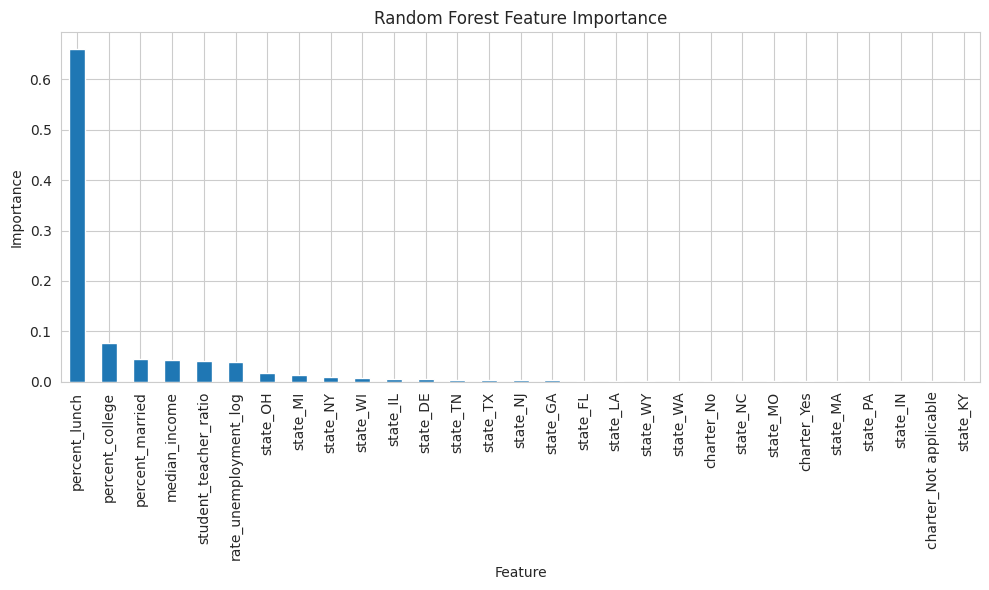

In [395]:
# Get feature importances from the Random Forest regressor
# The feature names need to be retrieved after one-hot encoding
feature_names = numerical_features + list(model_rf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_importances = model_rf.named_steps['regressor'].feature_importances_

# Create a pandas Series for easier visualization and sorting
importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances in descending order
sorted_importance = importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Random Forest Feature Importances:")
print(sorted_importance)

# Optional: Visualize feature importances
plt.figure(figsize=(10, 6))
sorted_importance.plot(kind='bar')
plt.title('Random Forest Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

### Try Different Modeling Techniques - Random Forest

Import necessary libraries for Random Forest and data preparation for scikit-learn.

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Prepare the data for the Random Forest model, including one-hot encoding for categorical variables.

In [398]:
# Define features (X) and target (y)
# Exclude 'id', 'year', 'school_type', 'school_level', 'state_id', and the original 'rate_unemployment'
features = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income',
            'percent_lunch', 'student_teacher_ratio', 'state', 'charter']
X = df[features]
y = df['average_act']

# Identify categorical and numerical features
categorical_features = ['state', 'charter']
numerical_features = [col for col in features if col not in categorical_features]

# Create a column transformer to apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with the preprocessor and the Random Forest Regressor
model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the Random Forest Regressor model.

In [399]:
# Train the model
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['rate_unemployment',
                                                   'percent_college',
                                                   'percent_married',
                                                   'median_income',
                                                   'percent_lunch',
                                                   'student_teacher_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['state', 'charter'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

Evaluate the Random Forest Regressor model's performance on the test set.

In [400]:
# Predict on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model Performance:")
print(f"RMSE: {rmse_rf:.3f}")
print(f"MAE: {mae_rf:.3f}")
print(f"R-squared: {r2_rf:.3f}")

Random Forest Model Performance:
RMSE: 1.349
MAE: 0.994
R-squared: 0.710


Compare Random Forest model performance to the reduced linear regression model.

In [401]:
# Performance metrics for the reduced linear regression model (from previous analysis)
rmse_reduced_linear = np.sqrt(mean_squared_error(df['average_act'], model_reduced.predict())).round(3)
mae_reduced_linear = mean_absolute_error(df['average_act'], model_reduced.predict())
r2_reduced_linear = model_reduced.rsquared

print(f"Reduced Linear Regression Model Performance (on training data):")
print(f"RMSE: {rmse_reduced_linear:.3f}")
print(f"MAE: {mae_reduced_linear:.3f}")
print(f"R-squared: {r2_reduced_linear:.3f}")

print("\nRandom Forest Model Performance (on test data):")
print(f"RMSE: {rmse_rf:.3f}")
print(f"MAE: {mae_rf:.3f}")
print(f"R-squared: {r2_rf:.3f}")

Reduced Linear Regression Model Performance (on training data):
RMSE: 1.421
MAE: 1.028
R-squared: 0.679

Random Forest Model Performance (on test data):
RMSE: 1.349
MAE: 0.994
R-squared: 0.710


R squared is 0.211, which indicates income alone doesn’t capture everything.

p-value for median_income is less than 0.001, indicating a statistically significant relationship.

The coefficient for median_income (4.732e-05) suggests that for every $1,000 increase in median household income, the average ACT score is estimated to increase by approximately 0.047 points.

Median income is a significant predictor, but not a dominant one — it explains only around 21% of the total variation.

This implies socioeconomic factors matter, but many other influences (school resources, teacher quality, demographics) also shape student outcomes.

Slight improvement in the R-squared (from 0.211 to 0.219), explains 0.8% more variance.

Adding the squared term slightly improves model performance, confirming that nonlinearity exists — but not a large one.

Median Income still matters, but the relationship isn’t perfectly linear. The negative coefficient for the quadratic term (-1.991e-10) suggests that the positive impact of median income on ACT scores diminishes as income increases.

The model explains much more variance than the single-variable models (R-squared value went up to 0.629), so including additional socioeconomic variables and categorical factors dramatically improves predictive power.

Strongest numerical predictors:
- **percent_lunch:** Negative coefficient (-7.593) indicates that a higher percentage of students receiving free/reduced lunch is associated with lower average ACT scores.
- **percent_college:** Positive coefficient (1.699) indicates that a higher percentage of adults with a college degree is associated with higher average ACT scores.
- **rate_unemployment_log:** Negative coefficient (-2.305) indicates that a higher log-transformed unemployment rate is associated with lower average ACT scores.

Median income and percent_married are not statistically significant predictors in this full model after controlling for other factors.

The reduced model, including only the significant numerical predictors (percent_college, percent_lunch, log-transformed unemployment rate) and the categorical variables (state and charter), remains highly predictive (R² = 0.628).

The dropped variables (median_income, percent_married, student_teacher_ratio) do not significantly influence ACT after accounting for the included factors.

The reduced model is numerically stable and easier to interpret than the full model.

Interpretation of significant numerical predictors:
- **Percent of students on free/reduced lunch (poverty proxy):** Largest negative effect (-7.587 coefficient), indicating a strong inverse relationship with ACT scores.
- **Percent of adults with college education:** Positive effect (1.714 coefficient), indicating a positive association with ACT scores.
- **Local unemployment rate (log-transformed):** Negative effect (-2.168 coefficient), indicating an inverse association with ACT scores.

Interpretation of Categorical Variables (State and Charter):
- The coefficients for different states represent the estimated difference in average ACT scores compared to the reference state, after accounting for the numerical socioeconomic factors and charter status.
- The coefficient for 'charter' (Yes vs. No/Not applicable) represents the estimated difference in average ACT scores for charter schools compared to non-charter schools, after accounting for the numerical socioeconomic factors and state.
- Statistically significant p-values for individual state or charter coefficients indicate that these factors have a significant impact on ACT scores beyond the included socioeconomic variables.

Model fit remains strong (R² = 0.628), so these variables explain most of the variation in ACT scores captured by the model.

The analysis strongly suggests that socioeconomic factors are significant predictors of average ACT scores in U.S. high schools. Specifically, the percentage of students receiving free or reduced lunch, the percentage of adults with a college degree in the community, and the local unemployment rate are the strongest socioeconomic predictors identified in the model.

Our final reduced model, which includes these three socioeconomic factors along with state and charter status, explains approximately 62.8% of the variance in average ACT scores (R² = 0.628). This highlights the substantial influence of socioeconomic conditions on student performance as measured by ACT scores.

While socioeconomic factors are powerful predictors, it is important to acknowledge that they do not explain the entire variation in ACT scores. Other factors, such as school resources, teacher quality, individual student characteristics, and regional differences not fully captured by state-level effects, also play a role.

In school_information data, 'id' is a 'float64' data type. The data type should be changed to 'object'.

In schools data also, the 'id' data type should be changed to object type.

Joining all the three dataframes using the primary key 'id'. Here, we are using left join because we need all the rows from
edgap and only the relevant rows to the edgap from the remaining dataframes.

Rename columns

Renaming the columns which has capital letters and short forms to lower case and describing column names.

'NCESSH' name in the three datasets should be changed to 'id', easier for merging all the datasets.